# Tokyo 2020 Paralympics

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from datetime import timedelta
import requests
from bs4 import BeautifulSoup as bs
import seaborn as sns

#### Importing dataframe, analysing and cleaning data

In [4]:
#importing csv file into Pandas Dataframe and saving as an object
tokyo2020 = pd.read_csv('tokyo2020_paralympics.csv')

In [5]:
tokyo2020.head() #review first 5 rows 

,title,playcount,date,devices,traffic,content
0,Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
1,Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
2,Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
3,Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
4,Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384


In [6]:
print(tokyo2020.shape)

(1339, 6)


In [7]:
tokyo2020[['title', 'playcount', 'devices']]

,title,playcount,devices
0,Tokyo 2020: Paralympics Live,1338,Smartphone
1,Tokyo 2020: Paralympics Live,1161,Smartphone
2,Tokyo 2020: Today At The Paralympics E12,848,Desktop
3,Tokyo 2020: Paralympics Live,723,Smartphone
4,Tokyo 2020: Today At The Paralympics E12,707,Desktop
...,...,...,...
1334,Tokyo 2020: Paralympics Live E13,1,Undefined
1335,Tokyo 2020: Paralympics Live E13,1,Desktop
1336,Tokyo 2020: Today At The Paralympics E13,1,Undefined
1337,Tokyo 2020: Today At The Paralympics E13,1,Tablet


In [8]:
tokyo2020[0:10] #Assessing Columns

,title,playcount,date,devices,traffic,content
0,Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
1,Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
2,Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
3,Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
4,Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384
5,Tokyo 2020: Today At The Paralympics E9,705,2021-09-01,Desktop,Direct traffic,IH000403381
6,Tokyo 2020: Paralympics Live,685,2021-08-30,Smartphone,Direct traffic,IH000403365
7,Tokyo 2020: Paralympics Live,663,2021-08-26,Desktop,Search engines,IH000403361
8,Tokyo 2020: Paralympics Live,659,2021-08-28,Smartphone,Direct traffic,IH000403363
9,Tokyo 2020: Paralympics Live,656,2021-08-26,Desktop,Direct traffic,IH000403361


In [9]:
tokyo_labelled = tokyo2020.set_index('title') #Use function to change index

In [10]:
tokyo_labelled.head()

,playcount,date,devices,traffic,content
title,,,,,
Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384


In [11]:
tokyo_labelled.iloc[[0,2,3,4], [0,2,3,4]] 

,playcount,devices,traffic,content
title,,,,
Tokyo 2020: Paralympics Live,1338,Smartphone,Direct traffic,IH000403361
Tokyo 2020: Today At The Paralympics E12,848,Desktop,Direct traffic,IH000403384
Tokyo 2020: Paralympics Live,723,Smartphone,Direct traffic,IH000403360
Tokyo 2020: Today At The Paralympics E12,707,Desktop,Search engines,IH000403384


In [12]:
# Filtering by playcount
tokyo_labelled[tokyo_labelled['playcount'] > 500] 

,playcount,date,devices,traffic,content
title,,,,,
Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384
Tokyo 2020: Today At The Paralympics E9,705,2021-09-01,Desktop,Direct traffic,IH000403381
Tokyo 2020: Paralympics Live,685,2021-08-30,Smartphone,Direct traffic,IH000403365
Tokyo 2020: Paralympics Live,663,2021-08-26,Desktop,Search engines,IH000403361
Tokyo 2020: Paralympics Live,659,2021-08-28,Smartphone,Direct traffic,IH000403363


In [13]:
#Filtering by playcount and device
tokyo_labelled[(tokyo_labelled['playcount'] > 500) & (tokyo_labelled['devices']=='Smartphone')]

,playcount,date,devices,traffic,content
title,,,,,
Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
Tokyo 2020: Paralympics Live,685,2021-08-30,Smartphone,Direct traffic,IH000403365
Tokyo 2020: Paralympics Live,659,2021-08-28,Smartphone,Direct traffic,IH000403363
Tokyo 2020: Swimming,652,2021-08-24,Smartphone,Direct traffic,PI000017060
Tokyo 2020: Cycling - Road,563,2021-09-03,Smartphone,Direct traffic,PI000017122
Tokyo 2020: Paralympics Live,548,2021-08-27,Smartphone,Direct traffic,IH000403362


In [14]:
#Filtering by playcount and device
tokyo_labelled.drop_duplicates()

,playcount,date,devices,traffic,content
title,,,,,
Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384
...,...,...,...,...,...
Tokyo 2020: Paralympics Live E13,1,2021-09-05,Undefined,NaN,IH000403371
Tokyo 2020: Paralympics Live E13,1,2021-09-05,Desktop,Search engines,IH000403371
Tokyo 2020: Today At The Paralympics E13,1,2021-09-05,Undefined,NaN,IH000403385


In [15]:
print(tokyo_labelled.shape)

(1339, 5)


In [16]:
#Percentage of nulls
tokyo2020.isnull().sum() / tokyo2020.shape[0] * 100

title        0.000000
playcount    0.000000
date         0.373413
devices      0.000000
traffic      0.896191
content      0.000000
dtype: float64

In [17]:
tokyo2020.shape[0]

1339

In [18]:
#Drop anything without a date
tokyo2020 = tokyo2020.dropna(subset=['date'])

In [19]:
tokyo2020

,title,playcount,date,devices,traffic,content
0,Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
1,Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
2,Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
3,Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
4,Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384
...,...,...,...,...,...,...
1334,Tokyo 2020: Paralympics Live E13,1,2021-09-05,Undefined,NaN,IH000403371
1335,Tokyo 2020: Paralympics Live E13,1,2021-09-05,Desktop,Search engines,IH000403371
1336,Tokyo 2020: Today At The Paralympics E13,1,2021-09-05,Undefined,NaN,IH000403385
1337,Tokyo 2020: Today At The Paralympics E13,1,2021-09-05,Tablet,Direct traffic,IH000403385


In [20]:
#Drop anything without a date
tokyo2020 = tokyo2020.fillna({'traffic':'Unknown'})

In [22]:
tokyo2020.head()

,title,playcount,date,devices,traffic,content
0,Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
1,Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
2,Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
3,Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
4,Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384


In [23]:
tokyo2020.isnull().sum() / tokyo2020.shape[0] * 100

title        0.0
playcount    0.0
date         0.0
devices      0.0
traffic      0.0
content      0.0
dtype: float64

In [24]:
#Average playcount
tokyo2020.mean()

playcount    43.856072
dtype: float64

tokyo2020.dtypes

In [26]:
#Converting date to a datetime object 
tokyo2020['date'] = pd.to_datetime(tokyo2020['date']) #Convert column to a datetime object using Panda

In [27]:
tokyo2020.dtypes

title                object
playcount             int64
date         datetime64[ns]
devices              object
traffic              object
content              object
dtype: object

In [28]:
#Set the date as the new index
tokyo2020.set_index('date')

,title,playcount,devices,traffic,content
date,,,,,
2021-08-26,Tokyo 2020: Paralympics Live,1338,Smartphone,Direct traffic,IH000403361
2021-08-29,Tokyo 2020: Paralympics Live,1161,Smartphone,Direct traffic,IH000403364
2021-09-04,Tokyo 2020: Today At The Paralympics E12,848,Desktop,Direct traffic,IH000403384
2021-08-25,Tokyo 2020: Paralympics Live,723,Smartphone,Direct traffic,IH000403360
2021-09-04,Tokyo 2020: Today At The Paralympics E12,707,Desktop,Search engines,IH000403384
...,...,...,...,...,...
2021-09-05,Tokyo 2020: Paralympics Live E13,1,Undefined,Unknown,IH000403371
2021-09-05,Tokyo 2020: Paralympics Live E13,1,Desktop,Search engines,IH000403371
2021-09-05,Tokyo 2020: Today At The Paralympics E13,1,Undefined,Unknown,IH000403385


<AxesSubplot:>

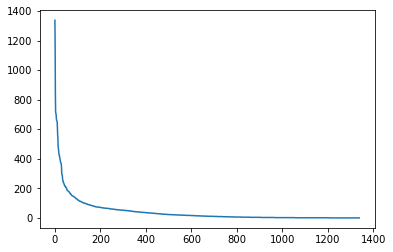

In [29]:
#Plotting by playcount
tokyo2020['playcount'].plot()

<AxesSubplot:>

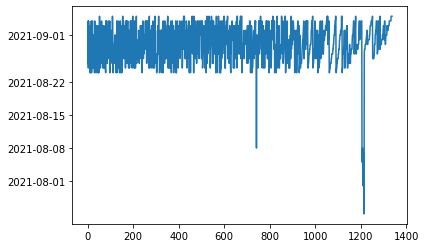

In [30]:
tokyo2020['date'].plot()

# Web Scraping

In [31]:
medals = requests.get('https://www.bbc.com/sport/disability-sport/58267874')

In [32]:
medals = requests.get('https://www.bbc.com/sport/disability-sport/58267874')
gold = bs(medals.content, 'lxml')

In [33]:
table = gold.find("table", {"class":"gs-o-table story-body__table"})

In [35]:
gold = pd.read_html(str(table))[0]

In [36]:
gold.head()

,Rank,Country,Gold,Silver,Bronze,Total
0,1,China,96,60,51,207
1,2,Great Britain,41,38,45,124
2,3,USA,37,36,31,104
3,4,RPC,36,33,49,118
4,5,Netherlands,25,17,17,59


In [37]:
gold.dtypes

Rank        int64
Country    object
Gold        int64
Silver      int64
Bronze      int64
Total       int64
dtype: object

In [41]:
gold_ireland = gold[(gold['Total'] < 10)]

In [42]:
gold_ireland.head()

,Rank,Country,Gold,Silver,Bronze,Total
21,22,Israel,6,2,1,9
26,27,Belarus,5,1,1,7
31,32,Ireland,4,2,1,7
33,34,South Africa,4,1,2,7
34,35,Cuba,4,1,1,6


In [45]:
gold_ireland_labelled = gold_ireland.set_index('Rank') #Use function to change index

In [47]:
gold_ireland_labelled.head()

,Country,Gold,Silver,Bronze,Total
Rank,,,,,
22,Israel,6,2,1,9
27,Belarus,5,1,1,7
32,Ireland,4,2,1,7
34,South Africa,4,1,2,7
35,Cuba,4,1,1,6


## Concatenation and Merging

In [20]:
#comparing overall overnight streaming before and after events 
pre = pd.DataFrame({"Week": ['31', '32', '33'],
                    "Overnight Playcount": [600, 700, 500]})

during  = pd.DataFrame({"Week": ['34', '35', '36'],
                    "Overnight Playcount": [2000, 5000, 4500]})

after  = pd.DataFrame({"Week": ['37', '38', '39'],
                    "Overnight Playcount": [200, 500, 450]})

In [21]:
pd.concat([pre,during,after], axis=0, ignore_index=True)

,Week,Overnight Playcount
0,31,600
1,32,700
2,33,500
3,34,2000
4,35,5000
5,36,4500
6,37,200
7,38,500
8,39,450


##### Inner join

In [24]:
High = pd.DataFrame({"Top": ['3128','2071', '3438', '1800', '1594'],
                    "Content": ['IH000403361', 'IH000403364', 'IH000403384', 'IH000403360', 'IH000403381']})

In [25]:
High

,Top,Content
0,3128,IH000403361
1,2071,IH000403364
2,3438,IH000403384
3,1800,IH000403360
4,1594,IH000403381


In [27]:
Medals = pd.DataFrame({"Content": ['IH000403361', 'IH000403364', 'IH000403384', 'IH000403360', 'IH000403381'],
                    "Medal": ['Gold', 'Gold', 'Silver', 'Gold', 'Bronze']})

In [28]:
Medals

,Content,Medal
0,IH000403361,Gold
1,IH000403364,Gold
2,IH000403384,Silver
3,IH000403360,Gold
4,IH000403381,Bronze


In [31]:
#Merging top performing content by events where medals were won
High.merge(Medals)

,Top,Content,Medal
0,3128,IH000403361,Gold
1,2071,IH000403364,Gold
2,3438,IH000403384,Silver
3,1800,IH000403360,Gold
4,1594,IH000403381,Bronze


# Visualisation

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
tokyo2020 = pd.read_csv('tokyo2020_paralympics.csv')

In [36]:
tokyo2020

,title,playcount,date,devices,traffic,content
0,Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
1,Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
2,Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
3,Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
4,Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384
...,...,...,...,...,...,...
1334,Tokyo 2020: Paralympics Live E13,1,2021-09-05,Undefined,NaN,IH000403371
1335,Tokyo 2020: Paralympics Live E13,1,2021-09-05,Desktop,Search engines,IH000403371
1336,Tokyo 2020: Today At The Paralympics E13,1,2021-09-05,Undefined,NaN,IH000403385
1337,Tokyo 2020: Today At The Paralympics E13,1,2021-09-05,Tablet,Direct traffic,IH000403385


In [37]:
tokyo_labelled = tokyo2020.set_index('title')

In [38]:
tokyo_labelled = tokyo_labelled[tokyo_labelled['playcount'] > 500] 

In [39]:
tokyo_labelled

,playcount,date,devices,traffic,content
title,,,,,
Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384
Tokyo 2020: Today At The Paralympics E9,705,2021-09-01,Desktop,Direct traffic,IH000403381
Tokyo 2020: Paralympics Live,685,2021-08-30,Smartphone,Direct traffic,IH000403365
Tokyo 2020: Paralympics Live,663,2021-08-26,Desktop,Search engines,IH000403361
Tokyo 2020: Paralympics Live,659,2021-08-28,Smartphone,Direct traffic,IH000403363


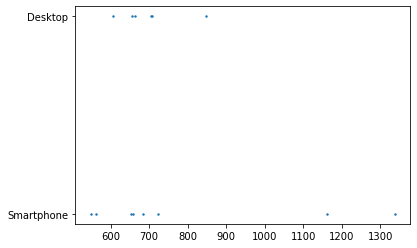

In [40]:
plt.scatter(tokyo_labelled['playcount'], tokyo_labelled['devices'], s=2)
plt.show()

In [43]:
tokyo2020 = pd.read_csv('tokyo2020_paralympics.csv')

In [45]:
tokyo2020

,title,playcount,date,devices,traffic,content
0,Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
1,Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
2,Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
3,Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
4,Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384
...,...,...,...,...,...,...
1334,Tokyo 2020: Paralympics Live E13,1,2021-09-05,Undefined,NaN,IH000403371
1335,Tokyo 2020: Paralympics Live E13,1,2021-09-05,Desktop,Search engines,IH000403371
1336,Tokyo 2020: Today At The Paralympics E13,1,2021-09-05,Undefined,NaN,IH000403385
1337,Tokyo 2020: Today At The Paralympics E13,1,2021-09-05,Tablet,Direct traffic,IH000403385


# Pandas

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
tokyo2020hours = pd.read_csv('tokyo2020_paralympics_hours.csv')
tokyo2020hours

,title,playcount,cuml hours spent,date,devices,traffic,content
0,Tokyo 2020: Paralympics Live,3128,1418.263889,2021-08-26,Smartphone,Direct traffic,IH000403361
1,Tokyo 2020: Paralympics Live,2071,696.590833,2021-08-29,Smartphone,Direct traffic,IH000403364
2,Tokyo 2020: Today At The Paralympics E12,1815,961.365278,2021-09-04,Desktop,Direct traffic,IH000403384
3,Tokyo 2020: Paralympics Live,1800,1037.310278,2021-08-25,Smartphone,Direct traffic,IH000403360
4,Tokyo 2020: Today At The Paralympics E12,1623,1097.885000,2021-09-04,Desktop,Search engines,IH000403384
...,...,...,...,...,...,...,...
808,Tokyo 2020: Highlights,4,0.001944,2021-09-04,Smartphone,Search engines,PI000017179
809,Tokyo 2020: Highlights,4,0.001111,2021-09-04,Tablet,Direct traffic,PI000017127
810,Tokyo 2020: Paralympics Live E7,4,0.019444,2021-08-30,Undefined,-,IH000403365
811,Tokyo 2020: Paralympics Live E11,4,0.078611,2021-09-03,Desktop,Search engines,IH000403369


<AxesSubplot:xlabel='playcount', ylabel='cuml hours spent'>

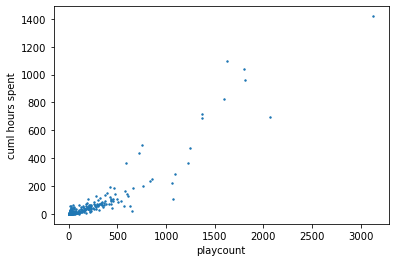

In [50]:
tokyo2020hours.plot.scatter('playcount', 'cuml hours spent', s=2)

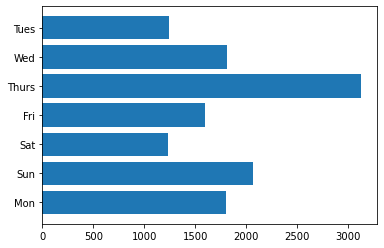

In [54]:
day = ['Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon']
playcount = [1244, 1815, 3128, 1594, 1229, 2071,
         1800]
plt.barh(day[::-1], playcount[::-1])
plt.show()

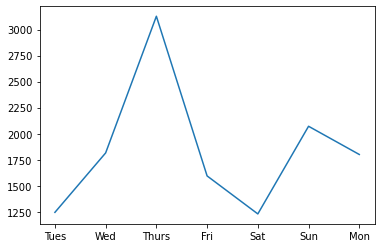

In [65]:
day = ['Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon']
playcount = [1244, 1815, 3128, 1594, 1229, 2071,
         1800]
plt.plot(day, playcount)
plt.show()

In [55]:
tally = pd.read_csv('paralympic_medal_tally.csv')

In [56]:
tally

,Rank,Country,Country-Code,Gold,Silver,Bronze,Total,Rank-by-Total
0,1,People's Republic of China,CHN,96,60,51,207,1
1,2,Great Britain,GBR,41,38,45,124,2
2,3,United States of America,USA,37,36,31,104,4
3,4,RPC,RPC,36,33,49,118,3
4,5,Netherlands,NED,25,17,17,59,9
...,...,...,...,...,...,...,...,...
81,78,Montenegro,MNE,0,0,1,1,73
82,78,Oman,OMA,0,0,1,1,73
83,78,Qatar,QAT,0,0,1,1,73
84,78,Chinese Taipei,TPE,0,0,1,1,73


In [58]:
import seaborn as sns

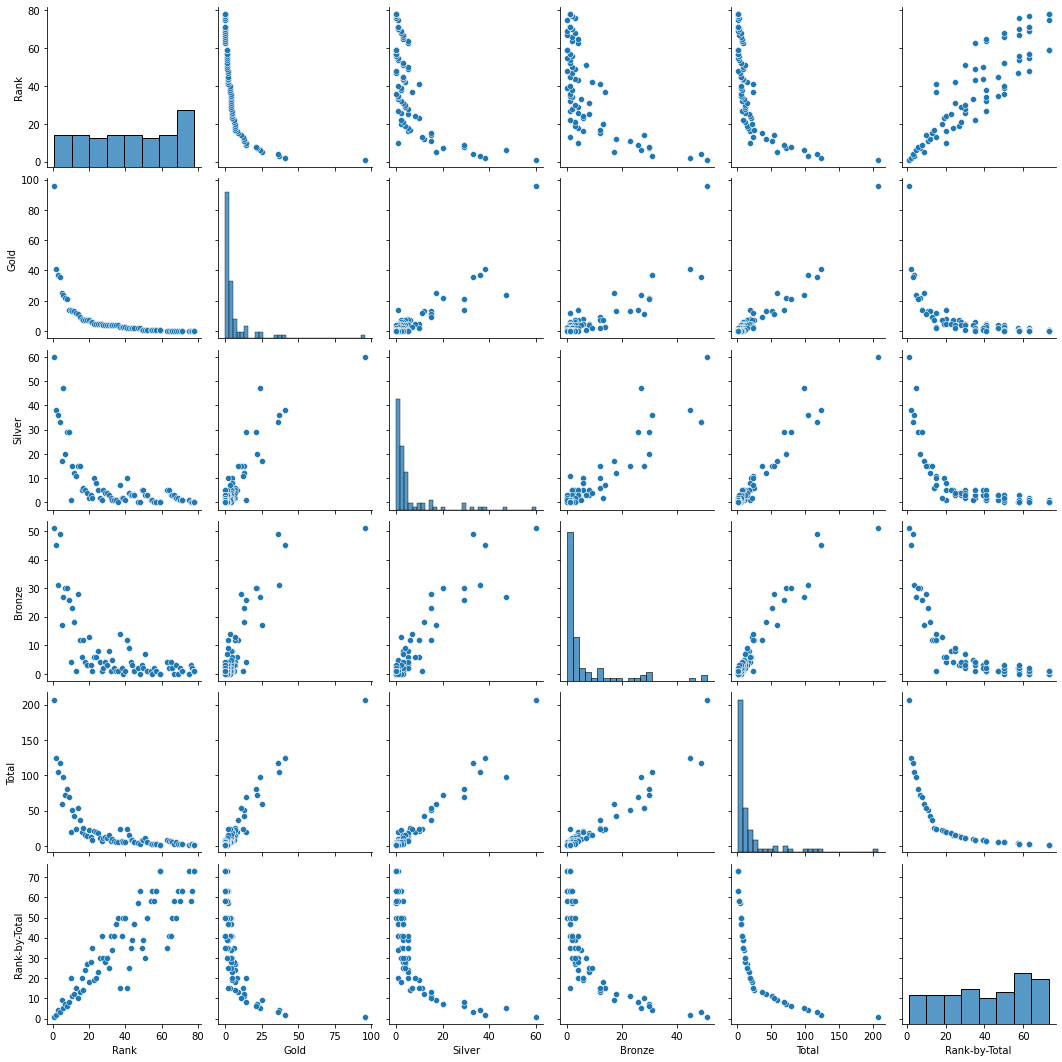

In [59]:
sns.pairplot(tally)

In [61]:
tally.corr()

,Rank,Gold,Silver,Bronze,Total,Rank-by-Total
Rank,1.000000,-0.622979,-0.643615,-0.661513,-0.667425,0.910831
Gold,-0.622979,1.000000,0.893632,0.852390,0.956459,-0.600949
Silver,-0.643615,0.893632,1.000000,0.917646,0.972194,-0.693153
Bronze,-0.661513,0.852390,0.917646,1.000000,0.956678,-0.728161
Total,-0.667425,0.956459,0.972194,0.956678,1.000000,-0.697248
Rank-by-Total,0.910831,-0.600949,-0.693153,-0.728161,-0.697248,1.000000


<AxesSubplot:>

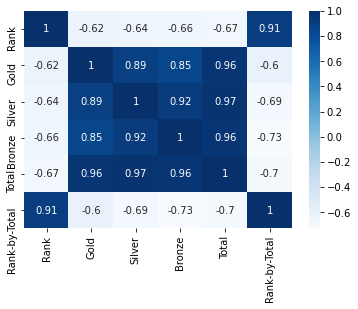

In [64]:
sns.heatmap(tally.corr(), annot=True, cmap='Blues')